<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
plt.gray()
plt.matshow(digits.images[1000])

In [ ]:
plt.gray() 
for i in range(6):
    plt.matshow(digits.images[i]) 

In [10]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits.target[0:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.3,random_state=10)
print(len(X_train),len(X_test))

1257 540


In [32]:
y_train[0]

2

In [38]:
X_train[0]

array([ 0.        , -0.34002441,  0.18520519,  0.99013788,  0.96717574,
        0.19121493, -0.41965604, -0.12152024, -0.06141664,  1.87913022,
        1.0583637 ,  0.24122558, -0.05959005,  1.29200483, -0.52390186,
       -0.12698406, -0.03733267,  0.98484844, -0.16117319, -1.23088319,
       -0.17710939,  1.15725398, -0.55495582, -0.11267424,  0.        ,
       -0.79108529, -1.47795127, -1.4847704 ,  0.50682086,  0.24276889,
       -0.63072922, -0.0528332 ,  0.        , -0.67789834, -1.21825825,
       -0.48003069,  0.95411253, -1.32753837, -0.82537636,  0.        ,
       -0.05218841, -0.5396944 , -0.91664322,  1.20203814,  0.05749058,
       -0.92195055,  0.36403289, -0.09060575, -0.03963009, -0.40337124,
        0.07803894,  1.23675586,  0.29717973,  1.20205922,  1.07216562,
       -0.21835605, -0.02638899, -0.29758055, -0.09688988,  0.894208  ,
        0.85363768,  0.04584977, -0.50311269, -0.19093267])

In [37]:
from sklearn import preprocessing
import numpy as np

scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [49]:
model.fit(X_train, y_train)

c:\Users\shivaraj_l\.conda\envs\shiva\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [50]:
model.score(X_test, y_test)

0.9592592592592593

9


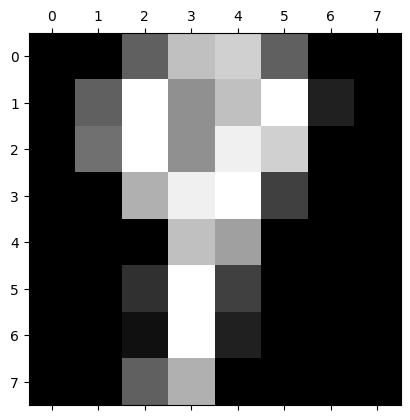

In [58]:
print(digits.target[69])
plt.matshow(digits.images[69])

In [59]:
model.predict([digits.data[69]])

array([8])

In [60]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [61]:
y_predicted = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 48,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 49,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0, 56,  0,  1],
       [ 0,  1,  1,  1,  0,  0,  1,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 51]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

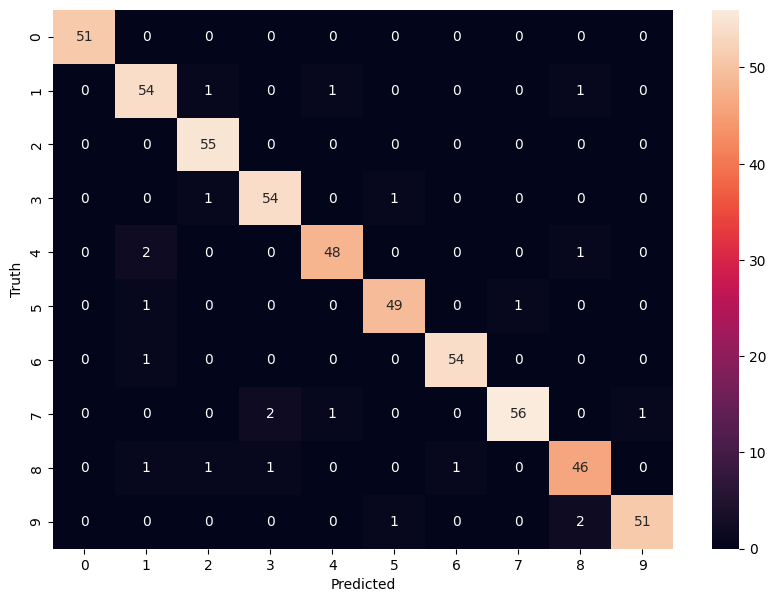

In [63]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />